# kNN (최근접 이웃 알고리즘)
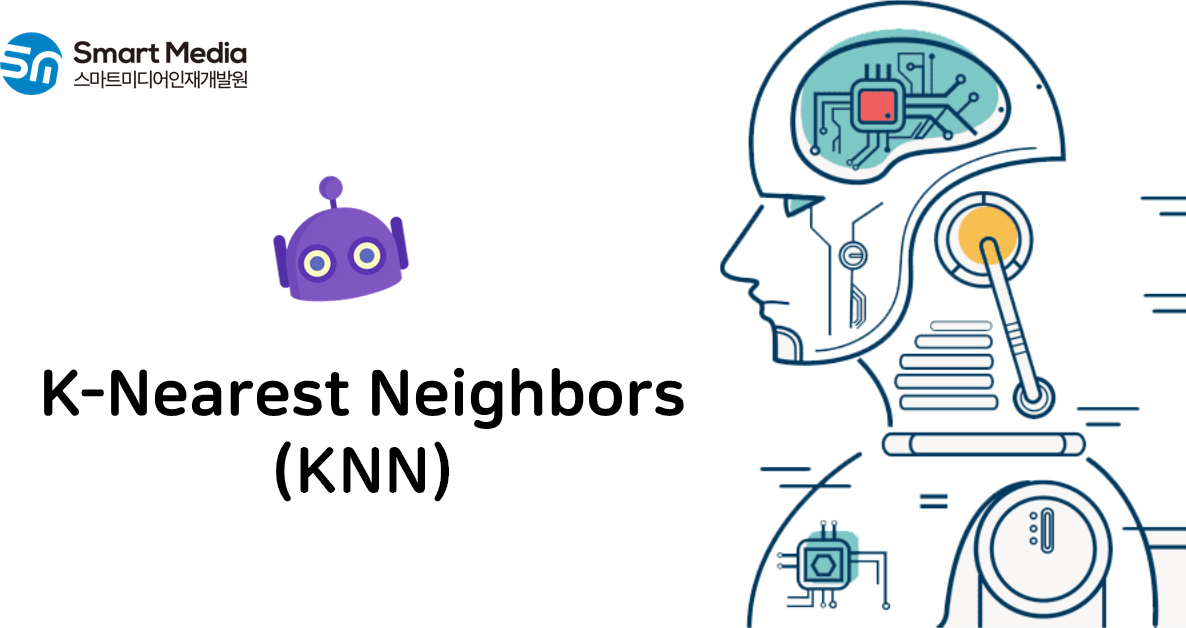

# 1. 데이터에 대해서 알아보자!

## 붓꽃 데이터 셋 

> ### 데이터 불러오기

In [3]:
# sklearn라이브러리 모듈 내 datasets 모듈에서 iris 데이터 셋을 임포트한다
from sklearn.datasets import load_iris

iris_dataset = load_iris()  # 데이터 불러오기

In [8]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

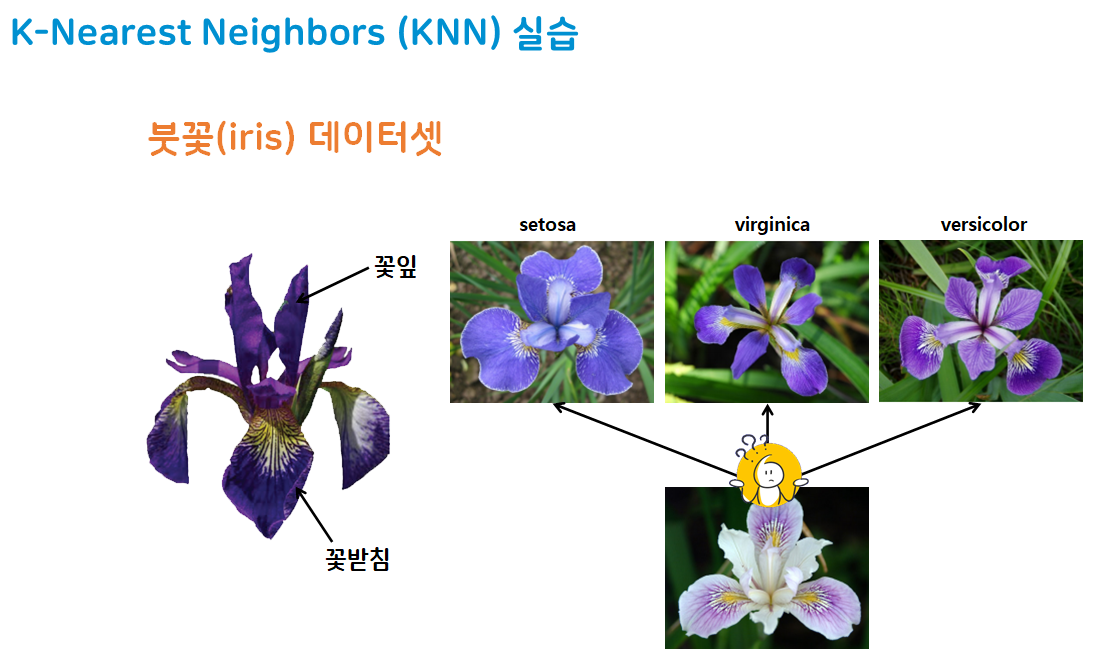

In [2]:
#  iris 데이터셋은  target_name 속성에 붗꽃 품종 클래스 레이블 정보가 저장되어 있다. 
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

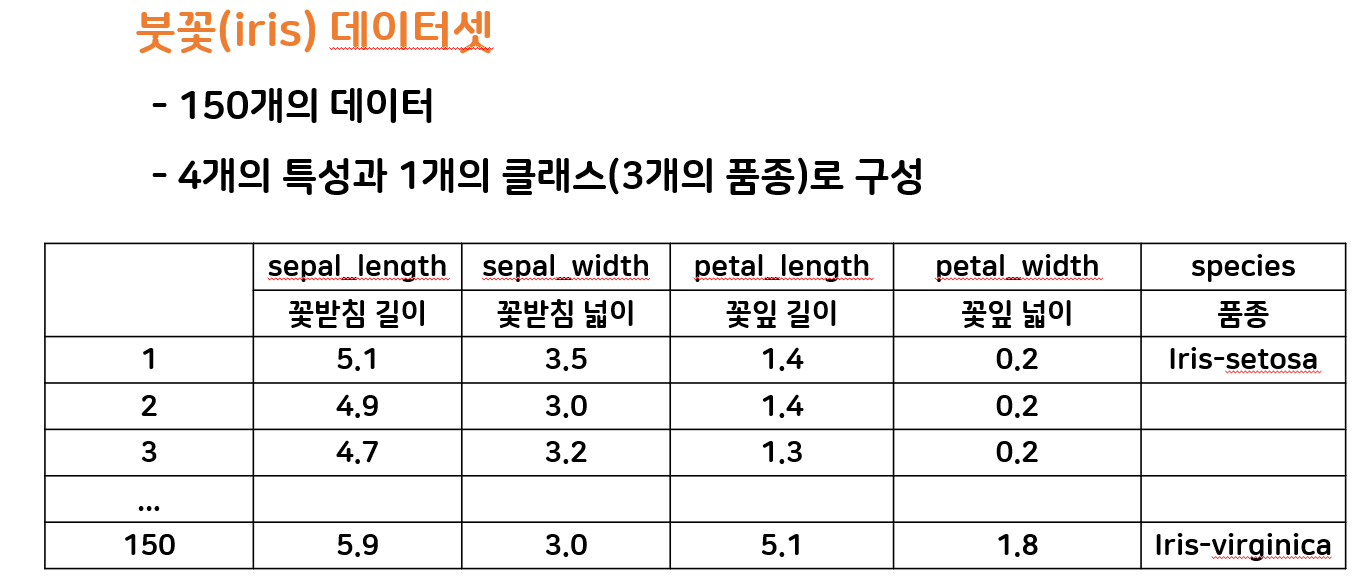

In [3]:
# iris 데이터셋은  feature_names에 붗꽃 데이터의 4가지 특성 데이터가 저장되어 있다. 
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
# 데이터 접근 방법 : data 레이블에 iris 데이터가 2차원 배열로 저장되어 있음
# 이후 머신러닝 수행시 문제 데이터로 사용
iris_dataset['data'][:5]  # iris 데이터의 처음 5개만 출력

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
# 데이터 셋 크기 확인
iris_dataset['data'].shape

(150, 4)

In [12]:
# 레이블 (0 : setosa, 1 : versicolor, 2 : virginica), 위 iris_dataset['data']의 정답
# 이후 머신러닝 수행시 정답 데이터로 활용
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# 레이블의 크기 확인
iris_dataset['target'].shape

(150,)

### 차후 머신러닝을 위해서 미리 훈련데이터와 검증데이터로 분리한다.

### 훈련 데이터와 테스트 데이터 분리

In [8]:
# train_test_split() 함수는 훈련 데이터와 검증(테스트)
from sklearn.model_selection import train_test_split

# 훈련 데이터를 75%, 테스트 데이터를 25% 선택
X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], 
                   random_state=0)

### 데이터 분석
- 산점도 그래프를 그리려면 Numpy 배열을 Pandas의 DataFrame으로 변환해야 함

In [11]:
X_train.astype

<function ndarray.astype>

In [12]:
import pandas as pd 

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

iris_dataframe.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0114F70C8>,
      dtype=object)

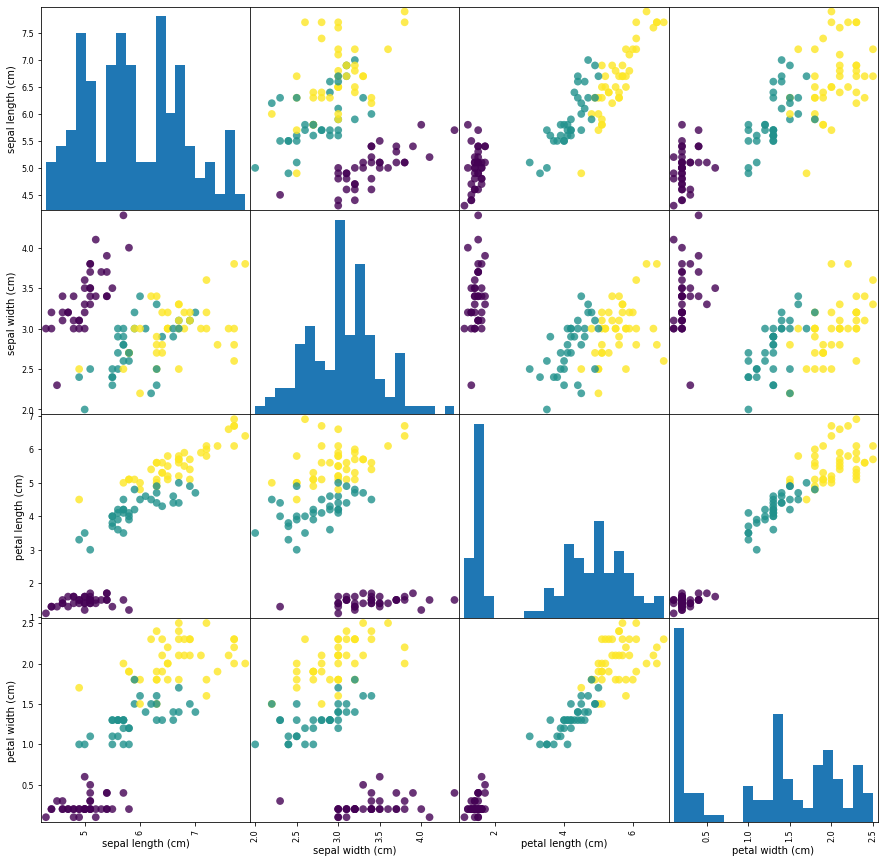

In [13]:
# c : 색상, marker : 마커모양, hist_kwds : 히스토그램 개수, s : 마커사이즈, alpha : 투명도
pd.plotting.scatter_matrix(iris_dataframe, c=Y_train, 
            figsize=(15,15), marker='o', hist_kwds={'bins':20}, 
            s=60, alpha=.8)

- 3개의 클래스가 꽃잎과 꽃받침의 측정값에 따라 비교적 잘 구분되는 것을 알 수 있음

## kNN (k-Nearest Neighboers) 적용

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# 1근접 
knn_model_iris = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn_model_iris.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
X_train

array([[5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.5, 1.6, 0.6],
       [5.4, 3.7, 1.5, 0.2],
       [5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3

### 예측하기

In [17]:
import numpy as np

# 꽃받침의 길이가 5cm, 폭이 2.9cm이고 꽃잎의 길이가 1cm, 폭이 0.2cm인 붓꽃을 보았을 때 품종은 ?
X_new = np.array([[5, 2.9, 1, 0.2]])

prediction = knn_model_iris.predict(X_new)

iris_dataset['target_names'][prediction]

array(['setosa'], dtype='<U10')

In [18]:
# predict() : 해당 모델로 예측
# 테스트 세트를 이용하여 예측
y_pred = knn_model_iris.predict(X_test)

y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

## 평가하기

In [19]:
# score() : 정확도 계산 
# 테스트 세트를 대상으로 평가
knn_model_iris.score(X_test, Y_test)

0.9736842105263158

## 임의의 2개 특성만을 이용하여 평가하기

In [20]:
# 앞 2개 열 데이터만 자름
#iris_dataset['data'][:,:2]
# 2열부터 마지막까지 자름 
#iris_dataset['data'][:,2:]
# 1열과 3열 데이터만 자름
#iris_dataset['data'][:,[1,2,3]]

In [21]:
# 특성 2개 (꽃받침 넓이와 길이만 사용)
X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'][:,:2],  
                 iris_dataset['target'], random_state=0)

In [22]:
X_train.shape

(112, 2)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# 1근접 
knn_model_iris = KNeighborsClassifier(n_neighbors=1)

knn_model_iris.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [24]:
import numpy as np

# 꽃받침의 길이가 10cm, 폭이 2.9cm 붓꽃을 보았을 때 품종은 ?
X_new = np.array([[10, 2.9]])

prediction = knn_model_iris.predict(X_new)

iris_dataset['target_names'][prediction]

array(['virginica'], dtype='<U10')

In [25]:
# predict() : 해당 모델로 예측
# 테스트 세트를 이용하여 예측
y_pred = knn_model_iris.predict(X_test)

y_pred

array([1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2])

In [26]:
# score() : 정확도 계산 
# 테스트 세트를 대상으로 평가
knn_model_iris.score(X_test, Y_test)

0.7105263157894737

### 하이퍼 파라미터 튜닝

In [27]:
from sklearn import metrics

test_list = []
train_list = []
for k in range(1,105,2):
    m = KNeighborsClassifier(n_neighbors=k)
    m.fit(X_train, Y_train)
    
    test_pre = m.predict(X_test)
    test_score = metrics.accuracy_score(test_pre,Y_test)
    test_list.append(test_score)
    
    train_pre = m.predict(X_train)
    train_score = metrics.accuracy_score(train_pre,Y_train)
    train_list.append(train_score)
    # print(k,":",test_score)

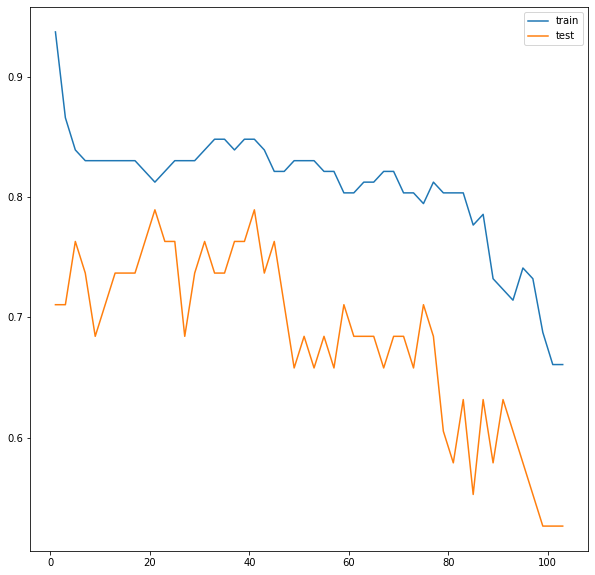

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(range(1,105,2), train_list, label='train')
plt.plot(range(1,105,2), test_list, label='test')
plt.legend()
plt.show()

In [29]:
!pip install mglearn

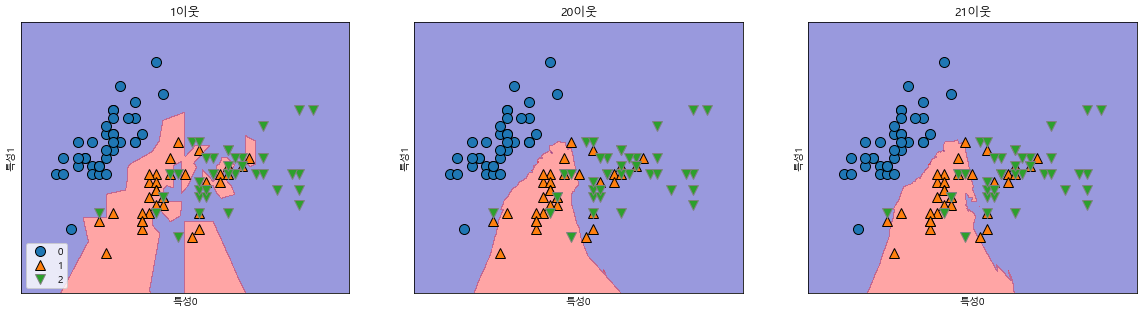

In [30]:
import mglearn
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fig, axes = plt.subplots( 1, 3 ,figsize = (20,5))

for n_neighbors, ax in  zip([1,20,21], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다.
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있다
    clf = KNeighborsClassifier( n_neighbors = n_neighbors).fit( X_train, Y_train )
    mglearn.plots.plot_2d_separator( clf, X_train, fill=True, eps= 0.5, ax=ax, alpha = 0.4)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],Y_train, ax = ax)
    ax.set_title("{}이웃".format(n_neighbors))
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
axes[0].legend(loc=3)

TypeError: plot_surface() missing 1 required positional argument: 'Z'

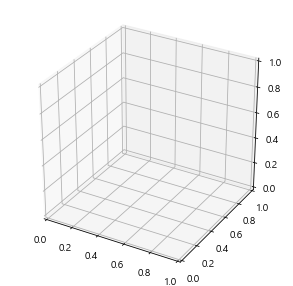

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5, 5))
axis = fig.gca(projection='3d')
#axis.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 0], c='r', cmap=mglearn.cm2)
#axis.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 0], zdir='z', s=20, c=None, depthshade=True)
Axes3D.plot_surface(X_train[:, 0], X_train[:, 1], X_train[:, 0])

Text(0.5, 0, '특성1 ** 2')

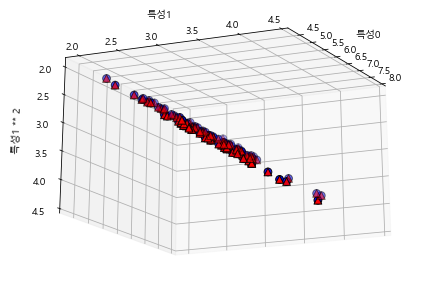

In [44]:
# 두 번째 특성을 제곱하여 추가합니다.
#X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-200, azim=-26)
# y == 0인 포인트를 먼저 그리고 그다음 y == 1인 포인트를 그립니다.
#mask = y == 0
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 1], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_train[ :, 0], X_train[:, 1], X_train[ :, 1], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

## 유방암 데이터 셋

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

cancer.keys()

In [ ]:
# 데이터와 특성의 수
cancer.data.shape

In [ ]:
import numpy as np

# 양성과 악성 데이터의 수
# zip() : 2개의 데이터를 연결
# bincount() : 클래스별 개수를 반환
for n, v in zip(cancer.target_names, np.bincount(cancer.target)):
  print({n:v})

In [ ]:
# 특성의 명칭
cancer.feature_names

## 훈련 데이터와 테스트 데이터로 분리

In [ ]:
# 타겟 레이블의 클래스 비율만큼 훈련셋과 테스트셋의 비율로 설정
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, 
          cancer.target, random_state=66)

In [ ]:
print(X_train.shape)
print(X_test.shape)

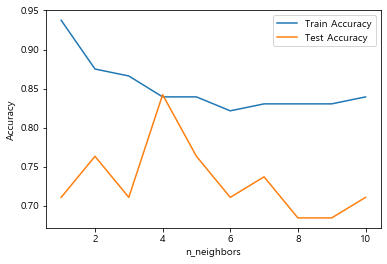

In [45]:
import matplotlib.pyplot as plt 

training_accuracy = []
test_accuracy = []

# 1에서 10까지 값을 neighbors_settings에 저장
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    knn_model_cancer = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model_cancer.fit(X_train, Y_train)
    
    # 훈련 세트 정확도 저장
    training_accuracy.append(knn_model_cancer.score(X_train, Y_train))
    
    # 테스트 세트 정확도 저장
    test_accuracy.append(knn_model_cancer.score(X_test, Y_test))

plt.plot(neighbors_settings, training_accuracy, label="Train Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#kNN 회귀

## 보스턴 집값 데이터 셋을 사용한 집값 예측

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()

boston.keys()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, Y_train)

### 예측하기

In [ ]:
pred = knn_reg.predict(X_test)

In [ ]:
Y_test

### 평가하기

In [ ]:
knn_reg.score(X_test, Y_test)

In [ ]:
# 평균 절대 오차의 합
sum(abs(pred-Y_test))/pred.size

## kNN의 장단점과 매개변수

- 주요 매개변수 : 거리 측정 방법(metric - 주로 유클리디안 방식을 사용), 이웃의 수 (n_neighbors)

- 쉽고 많은 조정이 없이도 좋은 성능을 발휘
- 훈련 세트가 크면 (특성의 수, 샘플의 수) 속도가 느림

- 희소 데이터 (특성 값이 대부분 0인)에서는 잘 작동하지 않음

- 전처리 과정이 중요함

- 현업에서는 잘 쓰이지 않음